In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_key_countries = pd.read_csv("../data/key-countries-pivoted.csv")
data_countries_aggregated = pd.read_csv("../data/countries-aggregated.csv")

# Convert the 'Date' column to datetime format
data_key_countries["Date"] = pd.to_datetime(data_key_countries["Date"])
data_countries_aggregated["Date"] = pd.to_datetime(data_countries_aggregated["Date"])

death_rates = pd.DataFrame()

In [4]:
# Calculate the death rates for the key countries
for country in data_key_countries.columns[1:]:
    country_data = data_countries_aggregated[
        data_countries_aggregated["Country"] == country
    ]
    country_data = country_data.set_index("Date")
    country_data["Death Rate"] = country_data["Deaths"] / country_data["Confirmed"]
    death_rates[country] = country_data["Death Rate"]

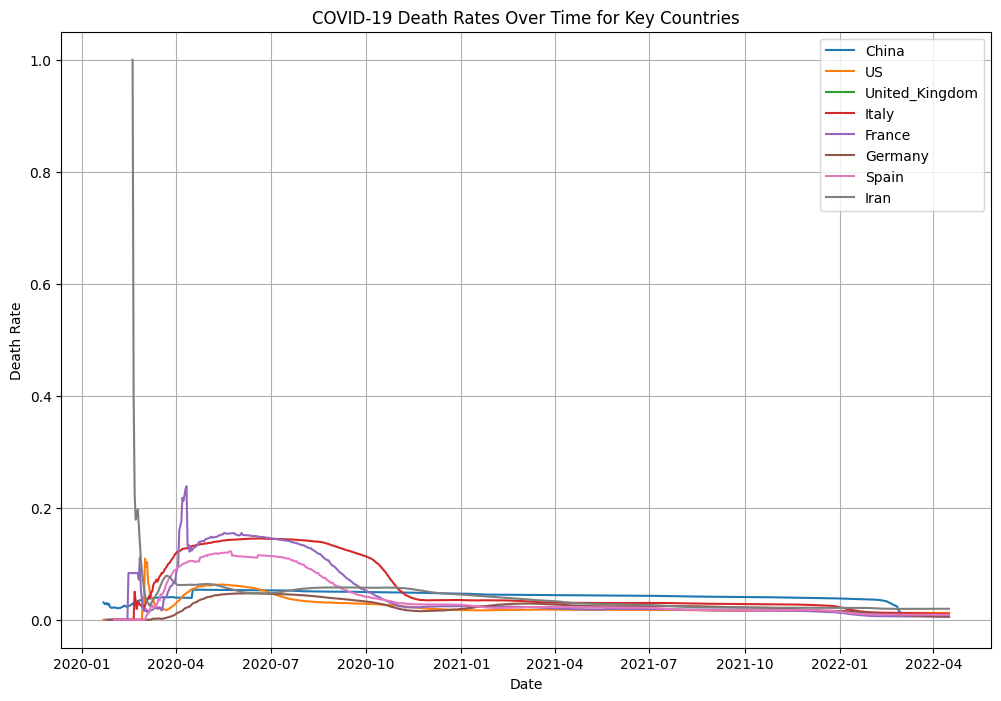

In [5]:
# Plot the death rates over time for each country
plt.figure(figsize=(12, 8))
for column in death_rates.columns:
    plt.plot(death_rates.index, death_rates[column], label=column)
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.title("COVID-19 Death Rates Over Time for Key Countries")
plt.legend()
plt.grid(True)
plt.show()

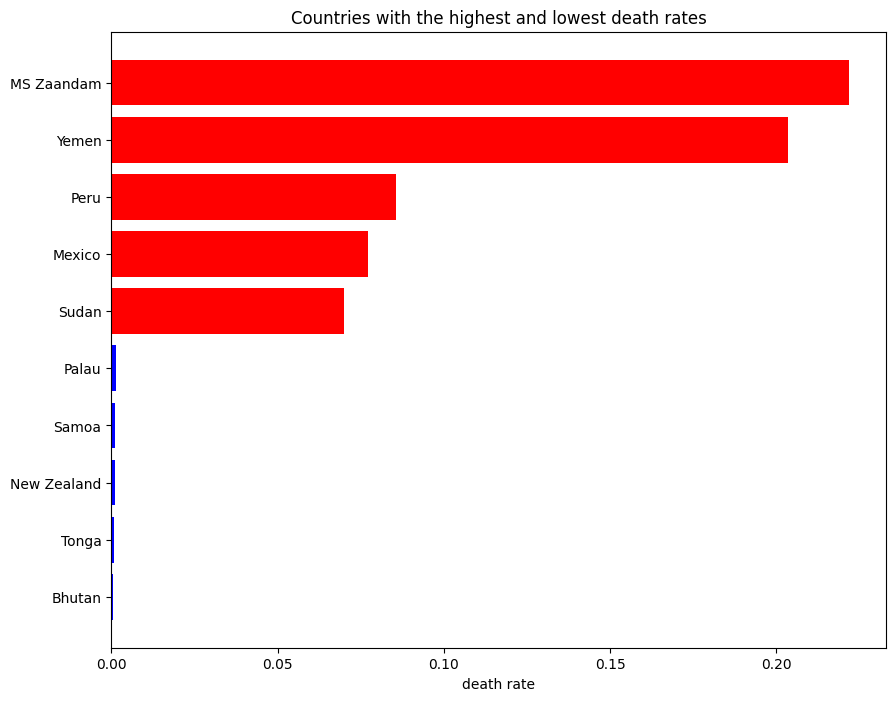

        Country   Confirmed     Deaths  DeathRate
106  MS Zaandam        6722       1492   0.221958
195       Yemen     3987738     810844   0.203334
139        Peru  1170867521  100102224   0.085494
116      Mexico  1726825683  133519933   0.077321
167       Sudan    22280839    1555801   0.069827

         Country  Confirmed  Deaths  DeathRate
135        Palau     286661     365   0.001273
150        Samoa      67600      79   0.001169
127  New Zealand   28858248   31223   0.001082
179        Tonga     216773     202   0.000932
20        Bhutan    2313658    1366   0.000590


In [6]:
data = data_countries_aggregated

country_data = data.groupby('Country').agg({'Confirmed': 'sum', 'Deaths': 'sum'}).reset_index()

country_data['DeathRate'] = country_data['Deaths'] / country_data['Confirmed']

country_data = country_data[country_data['Confirmed'] > 1000]

country_data_non_zero = country_data[country_data['DeathRate'] > 0]

country_data_non_zero = country_data_non_zero.sort_values('DeathRate', ascending=False)

top_5 = country_data_non_zero.head(5)
bottom_5_non_zero = country_data_non_zero.tail(5)


plot_data = pd.concat([top_5, bottom_5_non_zero])

colors = ['red']*5 + ['blue']*5

plt.figure(figsize=(10, 8))
plt.barh(plot_data['Country'], plot_data['DeathRate'], color=colors)
plt.xlabel('death rate')
plt.title('Countries with the highest and lowest death rates')
plt.gca().invert_yaxis()  # Reverse the order of the countries
plt.show()

print(top_5)
print()
print(bottom_5_non_zero)
